Vehicle Insurance Claims Prediction

The "Vehicle Insurance Claims Prediction" project was part of the "Allstate Claim Prediction Challenge" on Kaggle, held on 13-07-2011, with a focus on predicting claims payments. The goal was to develop predictive models to estimate insurance claims payments based on historical data and relevant features, using various machine learning techniques, data preprocessing methods, and feature engineering approaches to improve prediction accuracy.

Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

Import data:

In [2]:
x_train = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\train_set.csv')

x_test = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\test_set.csv')
example_entry = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\example_entry.csv')
x_test = x_test.merge(example_entry, on='Row_ID', how='left')

In [10]:
#temp = x_train.copy()
x_train = temp.copy()

Exploratory Data Analysis:

In [3]:
print('Number of training samples: ', format(len(x_train),','))
print('Number of test samples: ', format(len(x_test), ','))
print('Train % : ', round(len(x_train) / (len(x_train) + len(x_test)), 3)*100,'%')
print('Test %  : ', round(len(x_test) / (len(x_train) + len(x_test)), 3)*100, '%')

Number of training samples:  13,184,290
Number of test samples:  4,314,865
Train % :  75.3 %
Test %  :  24.7 %


In [4]:
print('Features in training data: \n', x_train.columns)

Features in training data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')


In [5]:
x_train[['Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year','Blind_Make', 'Blind_Model', 'Blind_Submodel']].head()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel
0,1,3,2005,2005,K,K.78,K.78.2
1,2,2,2005,2003,Q,Q.22,Q.22.3
2,3,1,2005,1998,AR,AR.41,AR.41.1
3,3,1,2006,1998,AR,AR.41,AR.41.1
4,3,2,2005,2001,D,D.20,D.20.0


In [6]:
x_train[['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat']].head()

,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat
0,D,C,F,?,?,C,?,C,A,B,F,D,4
1,B,C,A,A,A,E,C,A,B,A,B,D,5
2,B,?,A,A,A,C,C,A,B,A,E,D,2
3,B,?,A,A,A,C,C,A,B,B,B,B,2
4,J,C,B,?,?,D,?,A,B,A,B,B,5


In [ ]:
x_train[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4']].head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4
0,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419
1,0.217950,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419
2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
3,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
4,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419


In [ ]:
non_num_cols = x_train.select_dtypes(exclude=[np.number]).columns # include=[object]
for col in non_num_cols:
    filtered_indices = x_train[col].notnull() & x_train[col].str.contains('[^a-zA-Z0-9]', regex=True, na=False)
    unique_values = x_train.loc[filtered_indices, col].sort_values().unique()
    
    if filtered_indices.any():
        print(col, " : ", unique_values)

Blind_Make  :  ['?']
Blind_Model  :  ['?' 'A.2' 'A.3' ... 'Z.45' 'Z.5' 'Z.8']
Blind_Submodel  :  ['?' 'A.2.0' 'A.3.0' ... 'Z.45.0' 'Z.5.0' 'Z.8.0']
Cat1  :  ['?']
Cat2  :  ['?']
Cat3  :  ['?']
Cat4  :  ['?']
Cat5  :  ['?']
Cat6  :  ['?']
Cat7  :  ['?']
Cat8  :  ['?']
Cat10  :  ['?']
Cat11  :  ['?']
OrdCat  :  ['?']


In [33]:
cat_feats = x_train.columns[x_train.apply(lambda x: x == "?").any()]

q_data = []
for i in cat_feats:
    q_data.append([i, len(x_train[x_train[i]=="?"][i]), round((len(x_train[x_train[i]=="?"][i]) / len(x_train))*100, 4)])

q_data = pd.DataFrame(q_data, columns=['Feature name', 'No of "?"', 'Percentage of Occurrence'])

q_data.sort_values(by='No of "?"', ascending=False)

,Feature name,"No of ""?""",Percentage of Occurrence
9,Cat7,7167634,54.3650
7,Cat5,5637321,42.7579
6,Cat4,5631649,42.7148
4,Cat2,4874164,36.9695
12,Cat11,31469,0.2387
3,Cat1,25981,0.1971
8,Cat6,25981,0.1971
0,Blind_Make,8431,0.0639
1,Blind_Model,8431,0.0639
2,Blind_Submodel,8431,0.0639


In [79]:
x_train['OrdCat'].unique()

array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

In [3]:
print('Unique values in "Blind_Model" : ', x_train['Blind_Model'].sort_values().unique())
print('Number of unique values in "Blind_Model" : ', x_train['Blind_Model'].nunique())
print('Number of "?" in "Blind_Model : ', len(x_train.loc[x_train['Blind_Model']=="?", 'Blind_Model']))

Unique values in "Blind_Model" :  ['?' 'A.2' 'A.3' ... 'Z.45' 'Z.5' 'Z.8']
Number of unique values in "Blind_Model" :  1303
Number of "?" in "Blind_Model :  8431


In [ ]:
for i in range(len(x_train)):
    num = x_train['Blind_Model'].loc[i].split('.')
    if (num[0] != "?"):
        if not num[1].strip("'").isdigit():
            print(i, num[1])

In [5]:
print('Unique values in "Blind_Submodel" : ', x_train['Blind_Submodel'].sort_values().unique())
print('Number of unique values in "Blind_Submodel" : ', x_train['Blind_Submodel'].nunique())
print('Number of "?" in "Blind_Submodel" : ', len(x_train.loc[x_train['Blind_Submodel']=="?", 'Blind_Submodel']))

Unique values in "Blind_Submodel" :  ['?' 'A.2.0' 'A.3.0' ... 'Z.45.0' 'Z.5.0' 'Z.8.0']
Number of unique values in "Blind_Submodel" :  2740
Number of "?" in "Blind_Submodel" :  8431


In [38]:
for i in range(len(x_train)):
    num = x_train['Blind_Submodel'].loc[i].split('.')
    if (num[0] != "?"):
        if not num[1].strip("'").isdigit():
            print(i, num[1])
        if not num[2].strip("'").isdigit():
            print(i, num[2])

In [8]:
Unique_HID = x_train['Household_ID'].nunique() / len(x_train['Household_ID'])
print("% of unique values in Household_ID: {:.2f}%".format(Unique_HID * 100))

% of unique values in Household_ID: 32.68%


In [9]:
print(x_train['Vehicle'].nunique())
np.sort(x_train['Vehicle'].unique())

28


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], dtype=int64)

In [10]:
vehicle_stats = x_train.groupby(by='Vehicle')['Claim_Amount'].agg(['sum', 'count'])
vehicle_stats['% of occurrence'] = round((vehicle_stats['count'] / vehicle_stats['count'].agg('sum')) * 100, 4)
print(vehicle_stats)

                  sum    count  % of occurrence
Vehicle                                        
1        8.466029e+06  6363423          48.2652
2        5.238684e+06  3874475          29.3871
3        2.475997e+06  1755032          13.3115
4        1.097424e+06   714805           5.4216
5        3.898626e+05   277944           2.1081
6        1.548966e+05   114869           0.8713
7        6.690532e+04    47576           0.3609
8        2.371948e+04    19845           0.1505
9        1.525438e+04     8533           0.0647
10       5.131760e+03     3824           0.0290
11       2.089310e+03     1866           0.0142
12       1.386712e+03      931           0.0071
13       5.279128e+02      493           0.0037
14       0.000000e+00      273           0.0021
15       0.000000e+00      151           0.0011
16       1.034899e+02       96           0.0007
17       0.000000e+00       62           0.0005
18       0.000000e+00       30           0.0002
19       1.303231e+03       25          

<Axes: title={'center': 'Vehicle # within the household - Claim Amount'}, xlabel='Vehicle # within the household', ylabel='Sum of claim amount'>

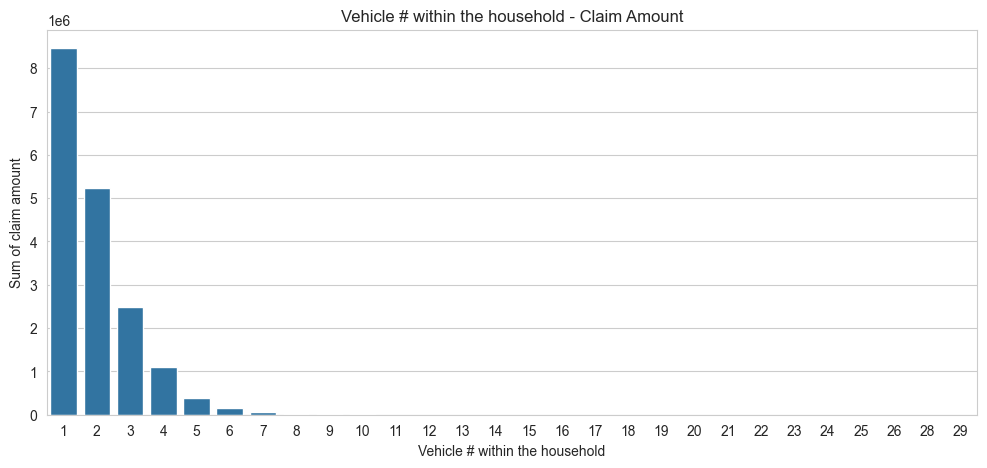

In [11]:
plt.figure(figsize=(12,5))
plt.title('Vehicle # within the household - Claim Amount')
plt.xlabel('Vehicle # within the household')
plt.ylabel('Sum of claim amount')
sns.barplot(x_train.groupby(by='Vehicle')['Claim_Amount'].agg('sum'))

In [12]:
x_train.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [13]:
x_train[['Row_ID', 'Household_ID', 'Vehicle']].head(16)

,Row_ID,Household_ID,Vehicle
0,1,1,3
1,2,2,2
2,3,3,1
3,4,3,1
4,5,3,2
5,6,3,2
6,7,4,1
7,8,4,2
8,9,4,3
9,10,5,1


In [14]:
x_train[x_train['Household_ID']==5]

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
10,11,5,1,2006,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
11,12,5,3,2005,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
12,13,5,3,2006,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
13,14,5,4,2005,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
14,15,5,4,2006,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0


In [15]:
x_train['Calendar_Year'].unique()

array([2005, 2006, 2007], dtype=int64)

In [16]:
print(x_train['Model_Year'].nunique())
np.sort(x_train['Model_Year'].unique())

29


array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

In [17]:
print(x_train['Blind_Make'].nunique())
np.sort(x_train['Blind_Make'].unique())

75


array(['?', 'A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'AZ', 'B', 'BA', 'BB', 'BC', 'BD', 'BF',
       'BG', 'BH', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS',
       'BT', 'BU', 'BV', 'BW', 'BY', 'BZ', 'C', 'CA', 'CB', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [18]:
print(x_train['Blind_Model'].nunique())
np.sort(x_train['Blind_Model'].unique())

1303


array(['?', 'A.2', 'A.3', ..., 'Z.45', 'Z.5', 'Z.8'], dtype=object)

In [19]:
print(x_train['Blind_Submodel'].nunique())
np.sort(x_train['Blind_Submodel'].unique())

2740


array(['?', 'A.2.0', 'A.3.0', ..., 'Z.45.0', 'Z.5.0', 'Z.8.0'],
      dtype=object)

In [20]:
print(x_train['Cat1'].nunique())
np.sort(x_train['Cat1'].unique())

11


array(['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype=object)

In [21]:
print(x_train['OrdCat'].nunique())
x_train['OrdCat'].unique()

15


array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

In [22]:
print(x_train['Var1'].nunique())
np.sort(x_train['Var1'].unique()[:10])

360


array([-0.7542818, -0.6337572, -0.3766379,  0.017076 ,  0.2179505,
        0.3224052,  0.4429298,  0.5634545,  0.7000491,  1.2705325])

In [23]:
print(x_train['NVCat'].nunique())
x_train['NVCat'].unique()

15


array(['M', 'O', 'F', 'N', 'J', 'L', 'B', 'H', 'A', 'G', 'K', 'I', 'E',
       'C', 'D'], dtype=object)

In [24]:
print(x_train['NVVar1'].nunique())
x_train['NVVar1'].unique()

29


array([-0.2315299,  2.0546834,  1.4831301,  3.1977899,  2.5119259,
        1.1401981,  0.9115767,  4.3408966,  6.62711  ,  1.7280815,
        0.7482758,  0.6258001,  2.7078872,  3.8836539,  5.2553821,
        4.9124498,  0.4543341,  3.6876929,  1.2926123,  4.05512  ,
        2.3404601,  0.5305412,  0.6829554,  1.8260621,  1.6390083,
        0.3400235,  5.4840031,  1.0154955,  2.8167543])

In [25]:
x_train.groupby(by='Cat1')['Claim_Amount'].mean()

Cat1
?    0.793362
A    1.196787
B    1.475656
C    1.289835
D    1.313834
E    1.149625
F    1.425081
G    1.264641
H    1.269609
I    1.336931
J    1.178263
Name: Claim_Amount, dtype: float64

In [26]:
x_train['Vehicle'].dtype.name

'int64'

In [27]:
cat_feats = x_train[x_train.dtypes[x_train.dtypes == 'object'].index]

<Axes: >

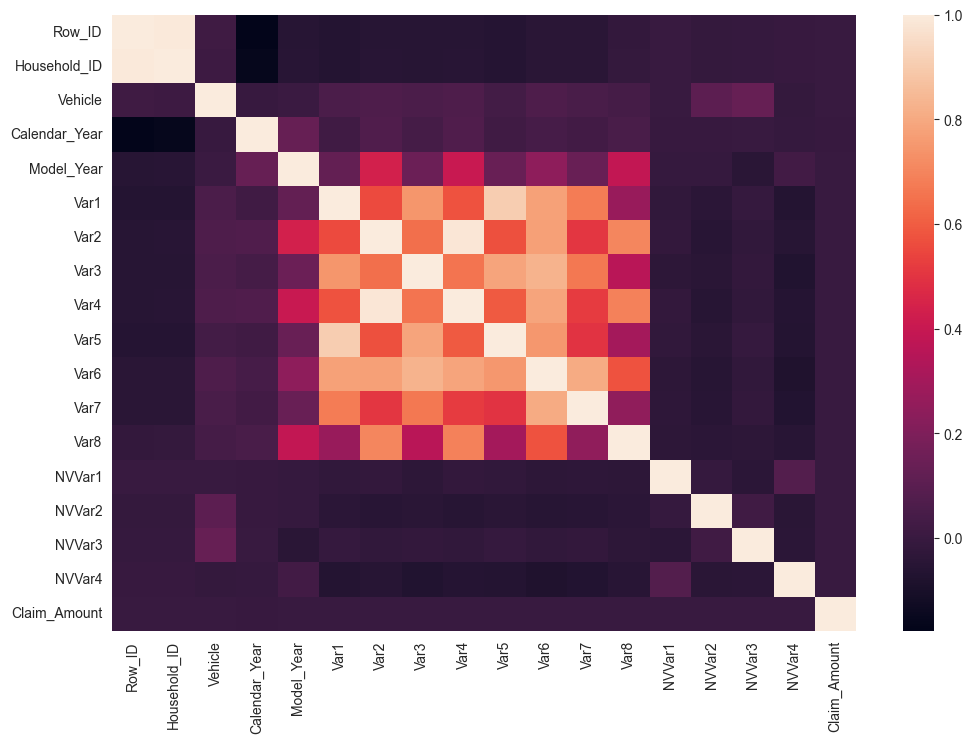

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train[x_train.dtypes[x_train.dtypes != 'object'].index].corr())

In [29]:
x_train[x_train.dtypes[x_train.dtypes != 'object'].index].corrwith(x_train['Claim_Amount'])

Row_ID           0.000633
Household_ID     0.000582
Vehicle          0.000965
Calendar_Year   -0.003552
Model_Year       0.000172
Var1            -0.000859
Var2            -0.001338
Var3            -0.001142
Var4            -0.001201
Var5            -0.000186
Var6            -0.001316
Var7            -0.001424
Var8            -0.001558
NVVar1           0.000487
NVVar2           0.001443
NVVar3           0.001943
NVVar4           0.000140
Claim_Amount     1.000000
dtype: float64

In [30]:
null_count = pd.DataFrame(x_train.isnull().sum(), columns=['Null_Count'])
null_count[null_count['Null_Count'] > 0]

,Null_Count
Cat12,28882


In [31]:
#Percentage of null values in the feature - "Cat12"
print("{:.2f}%".format(round(null_count[null_count['Null_Count'] > 0].loc['Cat12'][0] / len(x_train) * 100, 2)))

0.22%


In [32]:
print('Total number of data points: ', len(x_train))
print("Total number of data points with Non-Zero Claim Amounts: ", len(x_train[x_train['Claim_Amount']>0]))
print("Percentage of Non-Zero Claim Amounts: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']>0])/len(x_train), 4) * 100))
print("Percentage of data with Claim_Amount equals zero: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']==0]) / len(x_train) * 100, 2)))
print("Percentage of data for Claim_Amount between greater than 0 and less than 100: {:.2f}%".format(
      round((len(x_train[(x_train['Claim_Amount']>0) & (x_train['Claim_Amount']<100)]) / len(x_train)) * 100, 2)))
print("Percentage of data with Claim_Amount > 100: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']>=100]) / len(x_train), 4) * 100))

Total number of data points:  13184290
Total number of data points with Non-Zero Claim Amounts:  95605
Percentage of Non-Zero Claim Amounts: 0.73%
Percentage of data with Claim_Amount equals zero: 99.27%
Percentage of data for Claim_Amount between greater than 0 and less than 100: 0.47%
Percentage of data with Claim_Amount > 100: 0.26%


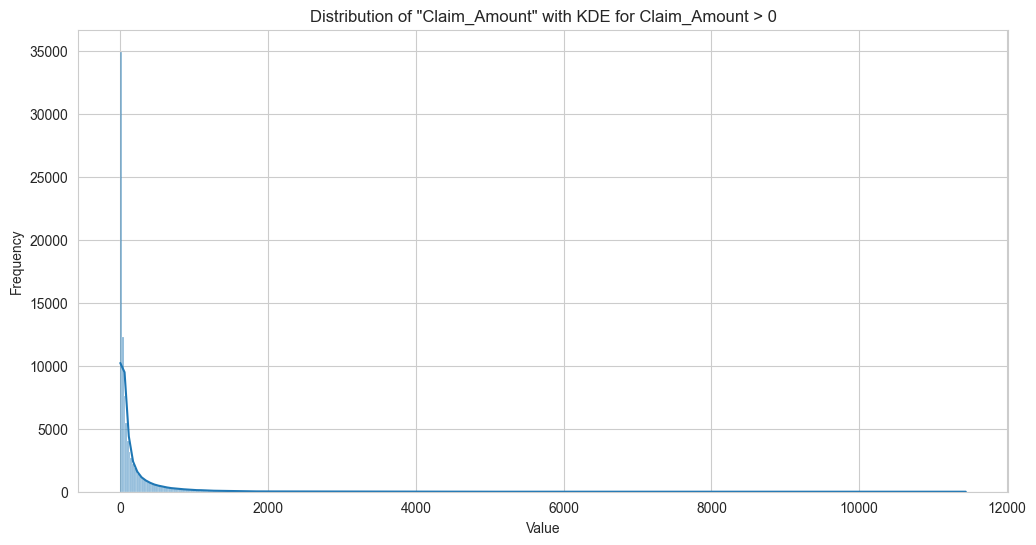

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(x_train[x_train['Claim_Amount']>0]['Claim_Amount'], bins=500, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 0')
plt.show()

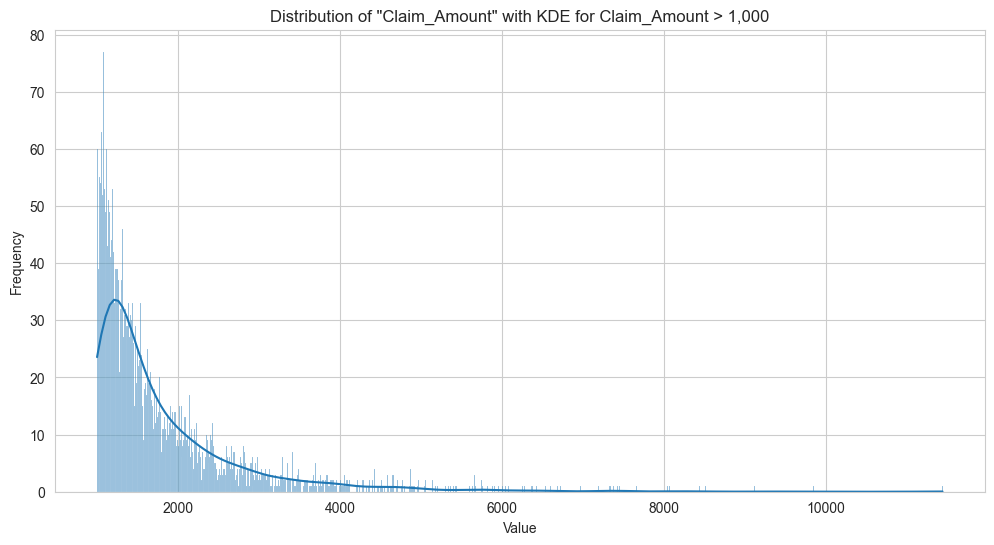

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(x_train[x_train['Claim_Amount']>1000]['Claim_Amount'], bins=1000, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 1,000')
plt.show()

Data Preprocessing:

In [3]:
x_train = x_train.drop(x_train[x_train['Claim_Amount']>100].index, axis=0)
x_test = x_test.drop(x_test[x_test['Claim_Amount']>100].index, axis=0)

In [4]:
cat_feats = x_train.columns[x_train.apply(lambda x: x == "?").any()]

q_data = []
for i in cat_feats:
    q_data.append([i, len(x_train[x_train[i]=="?"][i]), round((len(x_train[x_train[i]=="?"][i]) / len(x_train))*100, 4)])

q_data = pd.DataFrame(q_data, columns=['Feature name', 'No of "?"', 'Percentage of Occurrence'])
q_cols = q_data[q_data['No of "?"'] > 100000]['Feature name']

for i in q_cols:
    x_train[i] = x_train[i].replace("?", x_train[x_train[i]!="?"][i].value_counts().index[0])
    x_test[i] = x_test[i].replace("?", x_test[x_test[i]!="?"][i].value_counts().index[0])

In [5]:
x_train['OrdCat'] = pd.to_numeric(x_train['OrdCat'], errors='coerce')
x_train['OrdCat'] = x_train['OrdCat'].fillna(x_train.loc[x_train['OrdCat'].notna(), 'OrdCat'].mode()[0])
x_train['OrdCat'] = x_train['OrdCat'].astype(int)

Feature Engineering:

In [6]:
x_train['Calendar_Year_Nums'] = x_train['Calendar_Year']-2000
x_train['Model_Year_Nums'] = x_train['Model_Year']-1980
x_train['Calendar_Year_Model_Year_Add'] = x_train['Model_Year_Nums'] + x_train['Calendar_Year_Nums']
x_train['Calendar_Year_Model_Year_Sub'] = x_train['Model_Year_Nums'] - x_train['Calendar_Year_Nums']
x_train['Calendar_Year_Model_Year_Mul'] = x_train['Model_Year_Nums'] * x_train['Calendar_Year_Nums']
x_train['Calendar_Year_Model_Year_Div'] = x_train['Model_Year_Nums'] / x_train['Calendar_Year_Nums']

x_train['Model_Year_Log'] = np.log(x_train['Model_Year'])
x_train['Model_Year_Nums_Log'] = np.log(x_train['Model_Year_Nums'])
x_train['Calendar_Year_Log'] = np.log(x_train['Calendar_Year'])
x_train['Calendar_Year_Nums_Log'] = np.log(x_train['Calendar_Year_Nums'])
x_train['Vehicle_Log'] = np.log(x_train['Vehicle'])

#x_train['Model_Year_Exp'] = np.exp(x_train['Model_Year'])
x_train['Model_Year_Nums_Exp'] = np.exp(x_train['Model_Year_Nums'])
#x_train['Calendar_Year_Exp'] = np.exp(x_train['Calendar_Year'])
x_train['Calendar_Year_Nums_Exp'] = np.exp(x_train['Calendar_Year_Nums'])
x_train['Vehicle_Exp'] = np.exp(x_train['Vehicle'])

x_train.loc[x_train['Blind_Model']=="?", 'Blind_Model'] = "nan.nan"
x_train['Blind_Model_Char'] = x_train['Blind_Model'].str.split(".").str[0]
x_train.loc[x_train['Blind_Model_Char']=='nan', 'Blind_Model_Char'] = x_train['Blind_Model_Char'].mode()[0]
x_train['Blind_Model_Num'] = x_train['Blind_Model'].str.split(".").str[1].str.strip("'")
x_train['Blind_Model_Num'] = pd.to_numeric(x_train['Blind_Model_Num'], errors='coerce')
x_train['Blind_Model_Num'].fillna(x_train['Blind_Model_Num'].mode()[0], inplace=True)
x_train['Blind_Model_Num'] = x_train['Blind_Model_Num'].fillna(0).astype(int)
x_train.loc[x_train['Blind_Model']=="nan.nan", 'Blind_Model'] = x_train['Blind_Model'].mode()[0]

x_train.loc[x_train['Blind_Submodel']=="?", 'Blind_Submodel'] = "nan.nan"
x_train['Blind_Submodel_Num'] = x_train['Blind_Submodel'].str.split(".").str[2].str.strip("'")
x_train['Blind_Submodel_Num'] = pd.to_numeric(x_train['Blind_Submodel_Num'], errors='coerce')
x_train['Blind_Submodel_Num'].fillna(x_train['Blind_Submodel_Num'].mode()[0], inplace=True)
x_train['Blind_Submodel_Num'] = x_train['Blind_Submodel_Num'].fillna(0).astype(int)
x_train.loc[x_train['Blind_Submodel']=="nan.nan", 'Blind_Submodel'] = x_train['Blind_Submodel'].mode()[0]

x_train['Model_Nums'] = x_train['Blind_Model_Num'] + x_train['Blind_Submodel_Num']

In [7]:
x_test['Calendar_Year_Nums'] = x_test['Calendar_Year']-2000
x_test['Model_Year_Nums'] = x_test['Model_Year']-1980
x_test['Calendar_Year_Model_Year_Add'] = x_test['Model_Year_Nums'] + x_test['Calendar_Year_Nums']
x_test['Calendar_Year_Model_Year_Sub'] = x_test['Model_Year_Nums'] - x_test['Calendar_Year_Nums']
x_test['Calendar_Year_Model_Year_Mul'] = x_test['Model_Year_Nums'] * x_test['Calendar_Year_Nums']
x_test['Calendar_Year_Model_Year_Div'] = x_test['Model_Year_Nums'] / x_test['Calendar_Year_Nums']

x_test['Model_Year_Log'] = np.log(x_test['Model_Year'])
x_test['Model_Year_Nums_Log'] = np.log(x_test['Model_Year_Nums'])
x_test['Calendar_Year_Log'] = np.log(x_test['Calendar_Year'])
x_test['Calendar_Year_Nums_Log'] = np.log(x_test['Calendar_Year_Nums'])
x_test['Vehicle_Log'] = np.log(x_test['Vehicle'])

#x_test['Model_Year_Exp'] = np.exp(x_test['Model_Year'])
x_test['Model_Year_Nums_Exp'] = np.exp(x_test['Model_Year_Nums'])
#x_test['Calendar_Year_Exp'] = np.exp(x_test['Calendar_Year'])
x_test['Calendar_Year_Nums_Exp'] = np.exp(x_test['Calendar_Year_Nums'])
x_test['Vehicle_Exp'] = np.exp(x_test['Vehicle'])

x_test.loc[x_test['Blind_Model']=="?", 'Blind_Model'] = "nan.nan"
x_test['Blind_Model_Char'] = x_test['Blind_Model'].str.split(".").str[0]
x_test.loc[x_test['Blind_Model_Char']=='nan', 'Blind_Model_Char'] = x_test['Blind_Model_Char'].mode()[0]
x_test['Blind_Model_Num'] = x_test['Blind_Model'].str.split(".").str[1].str.strip("'")
x_test['Blind_Model_Num'] = pd.to_numeric(x_test['Blind_Model_Num'], errors='coerce')
x_test['Blind_Model_Num'].fillna(x_test['Blind_Model_Num'].mode()[0], inplace=True)
x_test['Blind_Model_Num'] = x_test['Blind_Model_Num'].fillna(0).astype(int)
x_test.loc[x_test['Blind_Model']=="nan.nan", 'Blind_Model'] = x_test['Blind_Model'].mode()[0]

x_test.loc[x_test['Blind_Submodel']=="?", 'Blind_Submodel'] = "nan.nan"
x_test['Blind_Submodel_Num'] = x_test['Blind_Submodel'].str.split(".").str[2].str.strip("'")
x_test['Blind_Submodel_Num'] = pd.to_numeric(x_test['Blind_Submodel_Num'], errors='coerce')
x_test['Blind_Submodel_Num'].fillna(x_test['Blind_Submodel_Num'].mode()[0], inplace=True)
x_test['Blind_Submodel_Num'] = x_test['Blind_Submodel_Num'].fillna(0).astype(int)
x_test.loc[x_test['Blind_Submodel']=="nan.nan", 'Blind_Submodel'] = x_test['Blind_Submodel'].mode()[0]

x_test['Model_Nums'] = x_test['Blind_Model_Num'] + x_test['Blind_Submodel_Num']

In [ ]:
# Things to do next:
    # Combine "Household_ID", "Vehicle", "Calendar_Year" and "Model_Year" in different ways
    # Generate new features from "Year" features
    # Generate new features from make and model features by removing ".". Also, separate numbers and text from these features and check effectiveness

    # Generate mathematical features by combining the features
    # Develop a strategy to combine the text features

In [8]:
cat_features = x_train[x_train.dtypes[x_train.dtypes == 'object'].index].columns

x_train['Cat12'].fillna('NaN', inplace=True)
for i in cat_features:
    x = x_train[i].value_counts(normalize=True)
    x_train[i] = x_train[i].map(x)

x_test['Cat12'].fillna('NaN', inplace=True)
for i in cat_features:
    x = x_test[i].value_counts(normalize=True)
    x_test[i] = x_test[i].map(x)

Feature Scaling (temp heading):

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(x_train.drop(['Row_ID', 'Claim_Amount'], axis=1))
test_scaled = scaler.transform(x_test.drop(['Row_ID', 'Claim_Amount'], axis=1))

In [11]:
y_train = x_train['Claim_Amount']
y_test = x_test['Claim_Amount']

y_test.iloc[int(len(y_test)/5)] = 0.00001

Model Training & Evaluation:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score
from scipy import stats
import joblib

In [13]:
def gini(actual, pred):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

1. Linear Regression model:

In [42]:
lr_model = LinearRegression()
lr_model.fit(train_scaled, y_train)

LinearRegression()

In [43]:
joblib.dump(lr_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\lr_model_3.pkl')
#lr_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\lr_model_3.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\lr_model_3.pkl']

In [44]:
lr_pred = lr_model.predict(test_scaled)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, lr_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, lr_pred),4))
print('Mean Squared Error: ', round(mse(y_test, lr_pred),2))

Normalized Gini Coefficient:  1.0
Root Mean Squared Error:  0.0
Mean Squared Error:  0.0


2. XGBoost model with Random Search CV:

In [45]:
xgb_base_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
params_dist = {
                'learning_rate': stats.loguniform(1e-5, 0.1),
                'max_depth': stats.randint(3, 10),
                'n_estimators': stats.randint(5, 301),
                'colsample_bytree': stats.uniform(0.1, 0.9),
                'subsample': stats.uniform(0.1, 0.9),
                'min_child_weight': stats.randint(1, 11),
                'num_boost_round': stats.randint(10, 101),
                'gamma': stats.uniform(0.01, 0.49)
             }

xgb_rcv_model = RandomizedSearchCV(estimator=xgb_base_model, param_distributions=params_dist, n_iter=5, scoring='neg_mean_squared_error', cv=3, verbose=3, n_jobs=-1)

xgb_rcv_model.fit(train_scaled, y_train)
xgb_model = xgb_rcv_model.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
joblib.dump(xgb_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_5.pkl')
#xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_5.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\xgb_model_4.pkl']

In [ ]:
print('best score: ', xgb_rcv_model.best_score_)
print('best parameters: ')
xgb_rcv_model.best_params_

best score:  -7.446371227397993
best parameters: 


{'colsample_bytree': 0.5219531090590525,
 'gamma': 0.4469454567302962,
 'learning_rate': 0.022181943950479857,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 105,
 'num_boost_round': 41,
 'subsample': 0.2533282038160826}

In [ ]:
xgb_pred = xgb_model.predict(test_scaled)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))

Normalized Gini Coefficient:  0.19549
Root Mean Squared Error:  2.6302
Mean Squared Error:  6.92


In [ ]:
feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': train_scaled.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
17,Cat11,0.066552
6,Blind_Submodel,0.054056
12,Cat6,0.052970
20,Var1,0.041974
31,NVVar3,0.040936
9,Cat3,0.039446
10,Cat4,0.037503
27,Var8,0.037499
4,Blind_Make,0.036962
7,Cat1,0.036661


3. XGBoost model with hyperopt for CV:

In [14]:
space = {
            'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(0.1)),
            'max_depth': scope.int(hp.quniform('max_depth', 3, 9, 1)),
            'n_estimators': scope.int(hp.quniform('n_estimators', 5, 300, 1)),
            'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
            'subsample': hp.uniform('subsample', 0.1, 1.0),
            'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
            'num_boost_round': hp.quniform('num_boost_round', 10, 100, 10),
            'gamma': hp.uniform('gamma', 0.01, 0.5)
        }

def objective(params):
    xgb_base_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, **params)
    mse_scores = -cross_val_score(xgb_base_model, train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    return mse_scores.mean()

trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials) # max_evals=10

best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, **best_params)
xgb_model.fit(train_scaled, y_train)

100%|██████████| 5/5 [1:55:38<00:00, 1387.63s/trial, best loss: 6.955695241666213]  


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7613837693313291, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.029814942691046106,
             gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.007555968072089445,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=36, n_jobs=None,
             num_boost_round=10.0, ...)

In [16]:
feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_train.drop(['Row_ID', 'Claim_Amount'], axis=1).columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(25)

,Feature,Importance
28,NVCat,0.119494
2,Calendar_Year,0.078549
33,Calendar_Year_Nums,0.077611
30,NVVar2,0.043518
31,NVVar3,0.040523
14,Cat8,0.037410
3,Model_Year,0.031060
16,Cat10,0.029244
17,Cat11,0.027860
37,Calendar_Year_Model_Year_Mul,0.027750


In [17]:
joblib.dump(xgb_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_8.pkl')
#xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_8.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\xgb_model_hyperopt_8.pkl']

In [18]:
xgb_pred = xgb_model.predict(test_scaled)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

Root Mean Squared Error:  0.134
Mean Squared Error:  0.02
Normalized Gini Coefficient:  0.32719


In [17]:
xgb_pred = xgb_model.predict(test_scaled)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

Root Mean Squared Error:  0.0203
Mean Squared Error:  0.0
Normalized Gini Coefficient:  0.46406


In [ ]:
print('Best hyperparameters: ')
best_params

Best hyperparameters: 


{'colsample_bytree': 0.9613825263472475,
 'gamma': 0.09285808316856127,
 'learning_rate': 0.010087487201964389,
 'max_depth': 9,
 'min_child_weight': 3.0,
 'n_estimators': 279,
 'num_boost_round': 90.0,
 'subsample': 0.17973148003857287}

In [ ]:
# Latest output
print('Best hyperparameters: ')
best_params

In [ ]:
xgb_pred = xgb_model.predict(test_scaled)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

Root Mean Squared Error:  0.0191
Mean Squared Error:  0.0
Normalized Gini Coefficient:  0.27444


In [ ]:
# Latest output
xgb_pred = xgb_model.predict(test_scaled)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

In [ ]:
results = pd.DataFrame(trials.results)
params_df = pd.DataFrame(trials.vals)
results = pd.concat([results, params_df], axis=1)
results.drop('status', inplace=True, axis=1)
results

,loss,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,num_boost_round,subsample
0,6.877517,0.948193,0.418932,0.000059,6.0,2.0,104.0,60.0,0.719399
1,6.953909,0.361530,0.374304,0.000012,6.0,7.0,52.0,10.0,0.701533
2,6.954703,0.197729,0.013702,0.000019,7.0,5.0,28.0,30.0,0.574638
3,0.032081,0.961383,0.092858,0.010087,9.0,3.0,279.0,90.0,0.179731
4,4.643925,0.744733,0.131907,0.001436,7.0,5.0,190.0,60.0,0.411658
5,6.947870,0.227380,0.353779,0.000311,9.0,1.0,6.0,90.0,0.535066
6,2.591064,0.476972,0.035081,0.007584,8.0,5.0,147.0,60.0,0.703219
7,1.487047,0.660478,0.035954,0.023866,7.0,9.0,50.0,50.0,0.745727
8,5.686559,0.819232,0.478497,0.002883,6.0,3.0,42.0,60.0,0.457873
9,NaN,0.995002,0.177369,0.000145,6.0,5.0,80.0,30.0,0.637074


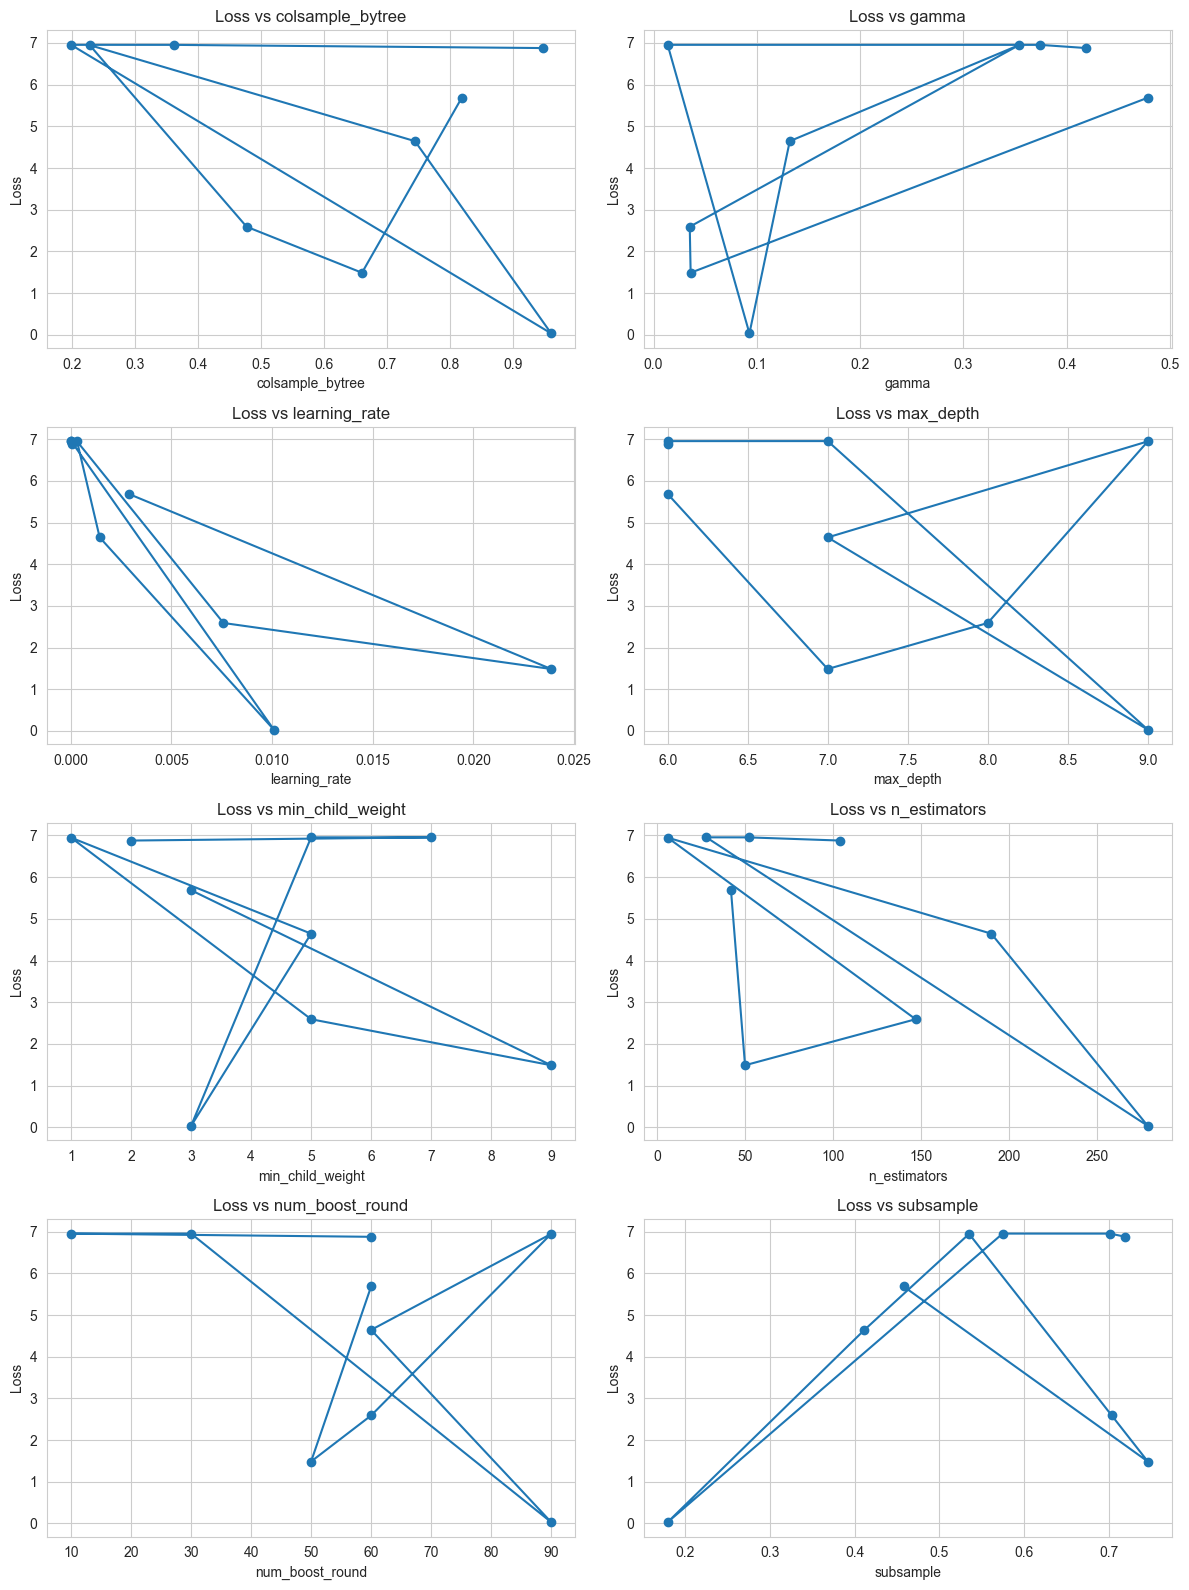

In [ ]:
Hyperparameters = results.columns.drop('loss')
loss = results['loss']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, Hyperparameter in enumerate(Hyperparameters):
    ax = axes[i]
    ax.plot(results[Hyperparameter], loss, linestyle='-', marker='o')
    ax.set_xlabel(Hyperparameter)
    ax.set_ylabel('Loss')
    ax.set_title(f'Loss vs {Hyperparameter}')
    ax.grid(True)

plt.tight_layout()
plt.show()

Final Inferencing - Base model:

In [11]:
xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_5.pkl')

xgb_pred = xgb_model.predict(test_scaled)
print('Results in a base model with no featurizations: ')
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

Results in a base model with no featurizations: 
Root Mean Squared Error:  0.0191
Mean Squared Error:  0.0
Normalized Gini Coefficient:  0.27444


Final Inferencing - with Featurization:

In [ ]:
#xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_5.pkl')

xgb_pred = xgb_model.predict(test_scaled)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

In [ ]:
submission_2_xgb_base_model = pd.DataFrame({"Row_ID" :x_test['Row_ID'], "Claim_Amount" : xgb_pred})
submission_2_xgb_base_model.to_csv(r"D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\submission_2_xgb_base_model.csv", index=False)